# <font color=#B40404>--------------------- Results of the Cosinor analysis ---------------------</font>

# Table of Contents

* [Importation of the data considering p-values and q-values ](#importation_data)
* [Number of significative periodic models for a 0.05 threshold](#nb_rhythmic_proteins_threshold)
    * [Considering p-values](#nb_rhythmic_proteins_pval)
    * [Considering q-values](#nb_rhythmic_proteins_qval)
* [Number of significative periodic models for a range of thresholds](#nb_rhythmic_proteins_range_threshold)
    * [Considering p-values](#nb_rhythmic_proteins_range_threshold_pval)
    * [Considering q-values](#nb_rhythmic_proteins_range_threshold_qval)

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.cbook import get_sample_data
import json
import pickle as pkl
import random
import os

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) # cosinorPy uses soon-to-be deprecated method pd.append...

# Importation of the data considering p-values and q-values <a class="anchor" id="importation_data"></a>

In [2]:
df_periodic_pval = pd.read_csv("data/Cosinor/cosinor_periodic_pval/cosinor_periodic_pval_concat_serie.csv")
df_periodic_qval = pd.read_csv("data/Cosinor/cosinor_periodic_qval/cosinor_periodic_qval_concat_serie.csv")

print(f"After the cosinor analysis, we obtain {len(df_periodic_pval)} significative models based on a p-value threshold")
print(f"After the cosinor analysis, we obtain {len(df_periodic_qval)} significative models based on a q-value threshold")


After the cosinor analysis, we obtain 10123 significative models based on a p-value threshold
After the cosinor analysis, we obtain 1686 significative models based on a q-value threshold


# Number of significative periodic models for a 0.05 threshold  <a class="anchor" id="nb_rhythmic_proteins_threshold"></a>

## Number of signifivative periodic models considering <font color=#B40404>p-values </font> <a class="anchor" id="nb_rhythmic_proteins_pval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.


In [3]:
Range_period = range(10,29)
rhythm_prots_period = pd.DataFrame(columns=['Period','nb_prots_ctrl','nb_prots_nlrp3'])
dataset_histo_ctrl = []
dataset_histo_nlrp3 = []

for period in Range_period :
    new_row = {"Period" : [period]}
    nb_prots_ctrl = 0
    nb_prots_nlrp3 = 0
    for i in range(len(df_periodic_pval)):
        [name, cond] = df_periodic_pval['test'].iloc[i].split('/')
        if df_periodic_pval['period'].iloc[i] == period and cond == "ctrl" :
            nb_prots_ctrl = nb_prots_ctrl+1 
            dataset_histo_ctrl.append(df_periodic_pval['period'].iloc[i])
        if df_periodic_pval['period'].iloc[i] == period and cond == "nlrp3" :
            nb_prots_nlrp3 = nb_prots_nlrp3+1
            dataset_histo_nlrp3.append(df_periodic_pval['period'].iloc[i])
    new_row.update({"nb_prots_ctrl" : [nb_prots_ctrl]})
    new_row.update({"nb_prots_nlrp3" : [nb_prots_nlrp3]})
    new_row = pd.DataFrame(new_row)
    rhythm_prots_period = pd.concat([rhythm_prots_period,new_row], ignore_index=True)

print(rhythm_prots_period)
filepath = os.path.join("data/Cosinor", 'rhythm_prots_period_pval.csv')
rhythm_prots_period.to_csv(filepath,index=False) 

   Period nb_prots_ctrl nb_prots_nlrp3
0      10           184            190
1      11           201            234
2      12           323            267
3      13           307            244
4      14           261            218
5      15           237            189
6      16           237            212
7      17           290            258
8      18           326            285
9      19           327            270
10     20           311            231
11     21           309            218
12     22           289            213
13     23           260            228
14     24           255            224
15     25           272            246
16     26           291            277
17     27           337            312
18     28           399            391


Histogram of the significative periodic models for the CTRL group and considering p-values

<Figure size 640x480 with 0 Axes>

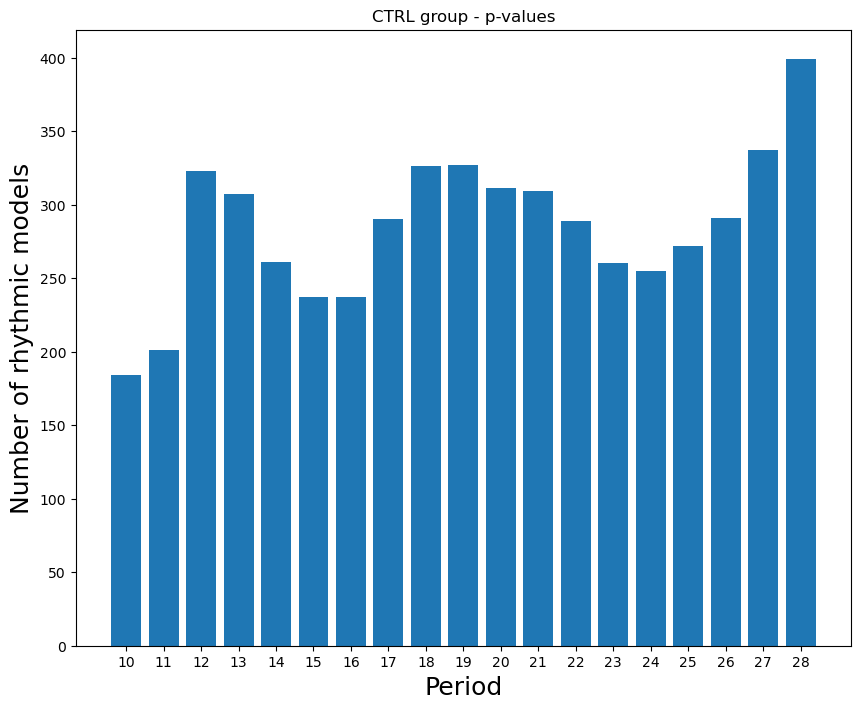

In [4]:
plt.figure(1)
figure(figsize=(10, 8))
labels, counts = np.unique(dataset_histo_ctrl, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_mass_spec_cosinor_ctrl_pval.png', dpi = 300)


Histogram of the significative periodic models for the NLRP3 group and considering p-values

<Figure size 640x480 with 0 Axes>

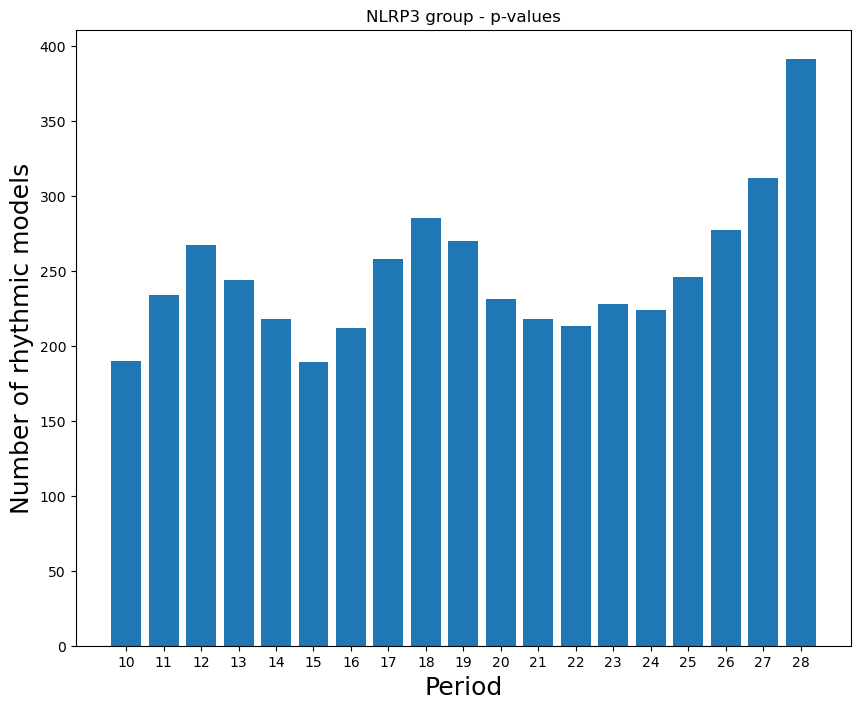

In [5]:
plt.figure(2)
figure(figsize=(10, 8))
labels, counts = np.unique(dataset_histo_nlrp3, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_mass_spec_cosinor_nlrp3_pval.png', dpi = 300)


## Number of significative periodic models considering <font color=#B40404> q-values </font> <a class="anchor" id="nb_rhythmic_proteins_qval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.

In [9]:
Range_period = range(10,29)

rhythm_prots_period = pd.DataFrame(columns=['Period','nb_prots_ctrl','nb_prots_nlrp3'])

dataset_histo_ctrl = []
dataset_histo_nlrp3 = []

for period in Range_period :
    new_row = {"Period" : [period]}
    nb_prots_ctrl = 0
    nb_prots_nlrp3 = 0
    for i in range(len(df_periodic_qval)):
        [name, cond] = df_periodic_qval['test'].iloc[i].split('/')
        if df_periodic_qval['period'].iloc[i] == period and cond == "ctrl" :
            nb_prots_ctrl = nb_prots_ctrl+1 
            dataset_histo_ctrl.append(df_periodic_qval['period'].iloc[i])
        if df_periodic_qval['period'].iloc[i] == period and cond == "nlrp3" :
            nb_prots_nlrp3 = nb_prots_nlrp3+1
            dataset_histo_nlrp3.append(df_periodic_qval['period'].iloc[i])
    new_row.update({"nb_prots_ctrl" : [nb_prots_ctrl]})
    new_row.update({"nb_prots_nlrp3" : [nb_prots_nlrp3]})
    new_row = pd.DataFrame(new_row)
    rhythm_prots_period = pd.concat([rhythm_prots_period,new_row], ignore_index=True)

print(rhythm_prots_period.sort_values(by=['nb_prots_ctrl']))
filepath = os.path.join("data/Cosinor", 'rhythm_prots_period_pval.csv')
rhythm_prots_period.to_csv(filepath,index=False) 

   Period nb_prots_ctrl nb_prots_nlrp3
0      10             8              9
1      11            12             16
5      15            29             18
6      16            32             22
4      14            33             17
2      12            34             20
3      13            39             21
7      17            45             37
8      18            49             39
10     20            61             45
9      19            61             40
11     21            63             41
12     22            65             47
13     23            73             48
18     28            73             55
17     27            76             55
16     26            80             53
14     24            82             50
15     25            85             53


Histogram of the significative periodic models for the CTRL group and considering q-values

<Figure size 640x480 with 0 Axes>

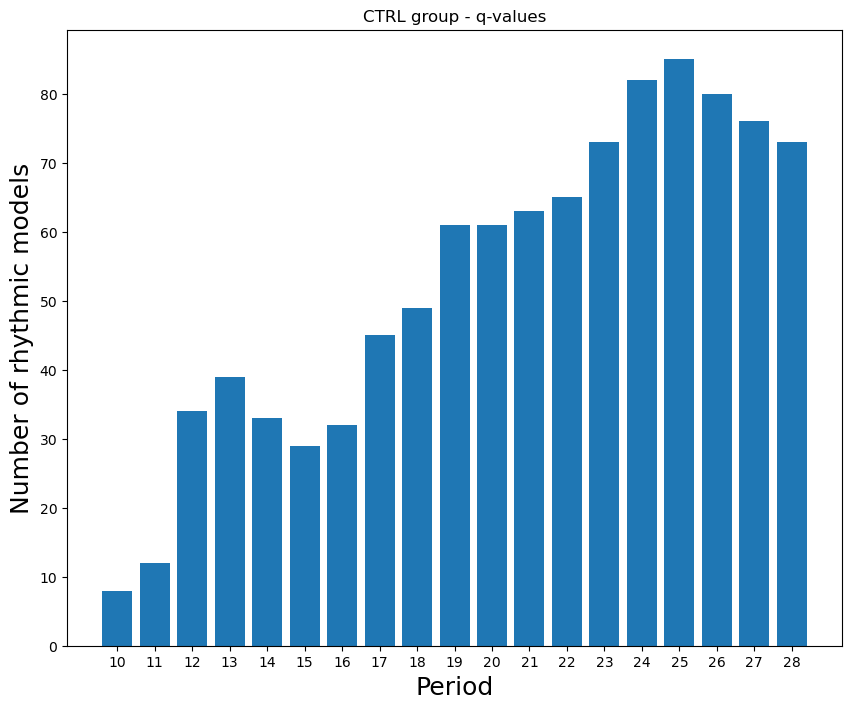

In [7]:
plt.figure(1)
figure(figsize=(10, 8))
labels, counts = np.unique(dataset_histo_ctrl, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_mass_spec_cosinor_ctrl_qval.png', dpi = 300)

Histogram of the significative periodic models for the NLRP3 group and considering q-values

<Figure size 640x480 with 0 Axes>

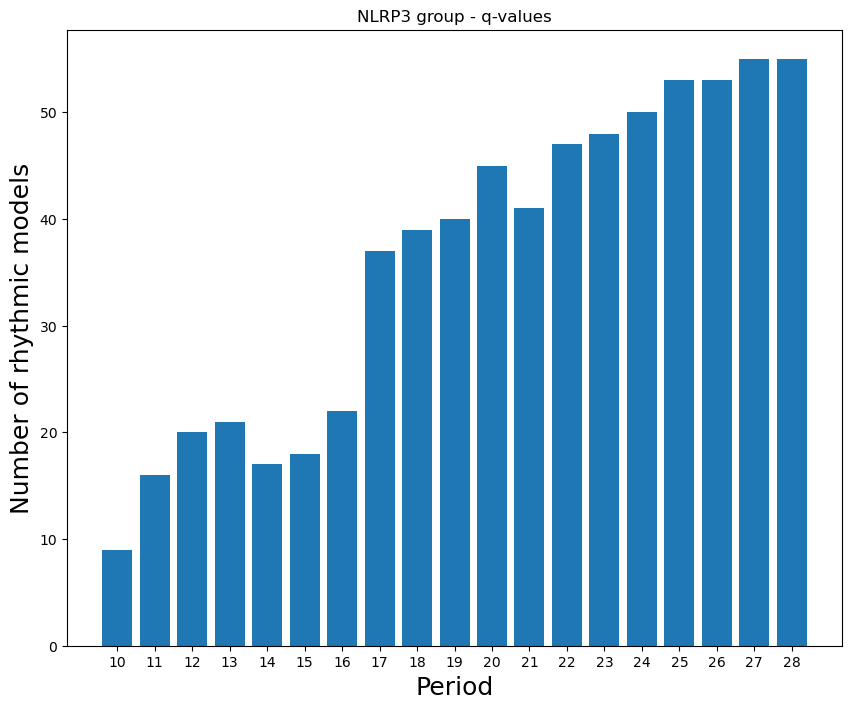

In [8]:
plt.figure(2)
figure(figsize=(10, 8))
labels, counts = np.unique(dataset_histo_nlrp3, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_mass_spec_cosinor_nlrp3_qval.png', dpi = 300)


# Number of significative periodic models for a range of thresholds  <a class="anchor" id="nb_rhythmic_proteins_range_threshold"></a>

## Number of significative periodic models for a range of thresholds considering <font color=#B40404> p-values </font> <a class="anchor" id="nb_rhythmic_proteins_range_threshold_pval"></a>

### CTRL - pval
Plot of the number of rhythmic models according to p-value threshold for each period value

<Figure size 640x480 with 0 Axes>

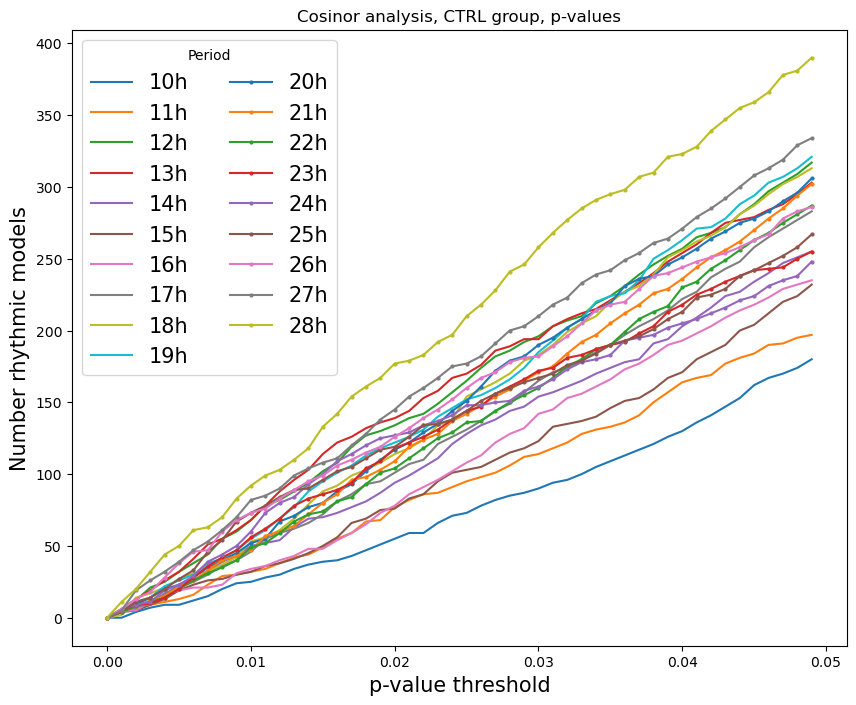

In [9]:
rhythm_prots_period_ctrl = {'pval':[],'nb_prots_ctrl_10':[],'nb_prots_ctrl_11':[],'nb_prots_ctrl_12':[],
                            'nb_prots_ctrl_13':[],'nb_prots_ctrl_14':[],'nb_prots_ctrl_15':[],'nb_prots_ctrl_16':[],
                            'nb_prots_ctrl_17':[],'nb_prots_ctrl_18':[],'nb_prots_ctrl_19':[],'nb_prots_ctrl_20':[],
                            'nb_prots_ctrl_21':[],'nb_prots_ctrl_22':[],'nb_prots_ctrl_23':[], 'nb_prots_ctrl_24':[],
                            'nb_prots_ctrl_25':[],'nb_prots_ctrl_26':[],'nb_prots_ctrl_27':[],'nb_prots_ctrl_28':[],
                            'nb_prots_ctrl_29':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_ctrl['pval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_ctrl.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_pval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_ctrl[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_ctrl"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_ctrl['pval'], rhythm_prots_period_ctrl[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, CTRL group, p-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("p-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_mass_spec_cosinor_ctrl_pval.png', dpi = 300)

### NLRP3 - pval
Plot of the number of rhythmic models according to p-value threshold for each period value

<Figure size 640x480 with 0 Axes>

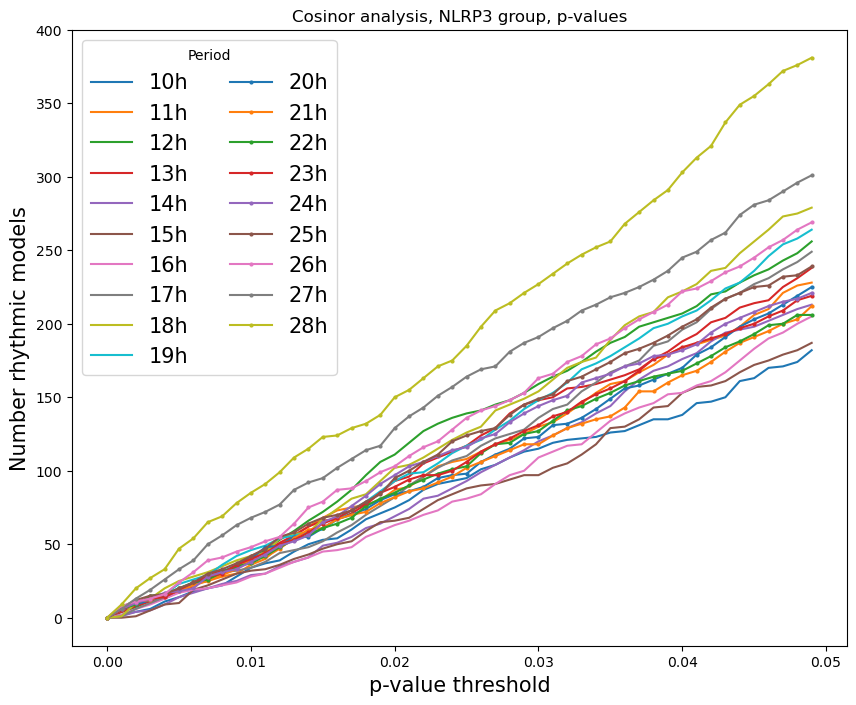

In [10]:
rhythm_prots_period_nlrp3 = {'pval':[],'nb_prots_nlrp3_10':[],'nb_prots_nlrp3_11':[],'nb_prots_nlrp3_12':[],
                            'nb_prots_nlrp3_13':[],'nb_prots_nlrp3_14':[],'nb_prots_nlrp3_15':[],'nb_prots_nlrp3_16':[],
                            'nb_prots_nlrp3_17':[],'nb_prots_nlrp3_18':[],'nb_prots_nlrp3_19':[],'nb_prots_nlrp3_20':[],
                            'nb_prots_nlrp3_21':[],'nb_prots_nlrp3_22':[],'nb_prots_nlrp3_23':[], 'nb_prots_nlrp3_24':[],
                            'nb_prots_nlrp3_25':[],'nb_prots_nlrp3_26':[],'nb_prots_nlrp3_27':[],'nb_prots_nlrp3_28':[],
                            'nb_prots_nlrp3_29':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_nlrp3['pval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_nlrp3.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_pval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_nlrp3[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_nlrp3"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)),cols, Range_period) :
    plt.plot(rhythm_prots_period_nlrp3['pval'], rhythm_prots_period_nlrp3[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, NLRP3 group, p-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("p-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_mass_spec_cosinor_nlrp3_pval.png', dpi = 300)


### BOTH - pval
Plot of the number of rhythmic models according to p-value threshold for each period value

<Figure size 640x480 with 0 Axes>

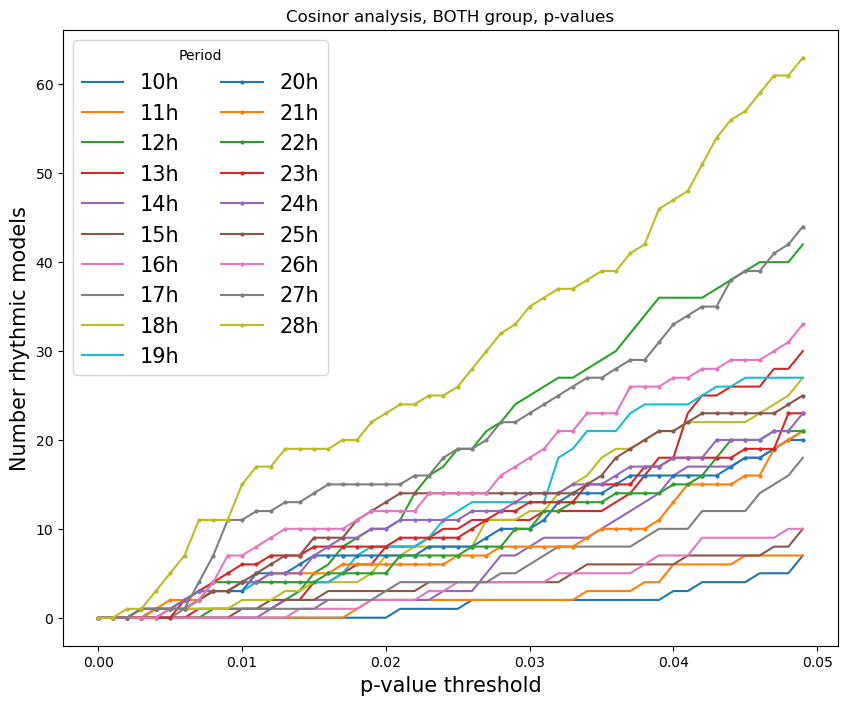

In [11]:
rhythm_prots_period_both = {'pval':[],'nb_prots_both_10':[],'nb_prots_both_11':[],'nb_prots_both_12':[],
                            'nb_prots_both_13':[],'nb_prots_both_14':[],'nb_prots_both_15':[],'nb_prots_both_16':[],
                            'nb_prots_both_17':[],'nb_prots_both_18':[],'nb_prots_both_19':[],'nb_prots_both_20':[],
                            'nb_prots_both_21':[],'nb_prots_both_22':[],'nb_prots_both_23':[], 'nb_prots_both_24':[],
                            'nb_prots_both_25':[],'nb_prots_both_26':[],'nb_prots_both_27':[],'nb_prots_both_28':[],
                            'nb_prots_both_29':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_both['pval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_both.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_pval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_both[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_both"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_both['pval'], rhythm_prots_period_both[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, BOTH group, p-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("p-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_mass_spec_cosinor_both_pval.png', dpi = 300)


## Number of significative periodic models for a range of thresholds considering <font color=#B40404> q-values </font> <a class="anchor" id="nb_rhythmic_proteins_range_threshold_qval"></a>

### CTRL - qval
Plot of the number of rhythmic models according to q-value threshold for each period value

<Figure size 640x480 with 0 Axes>

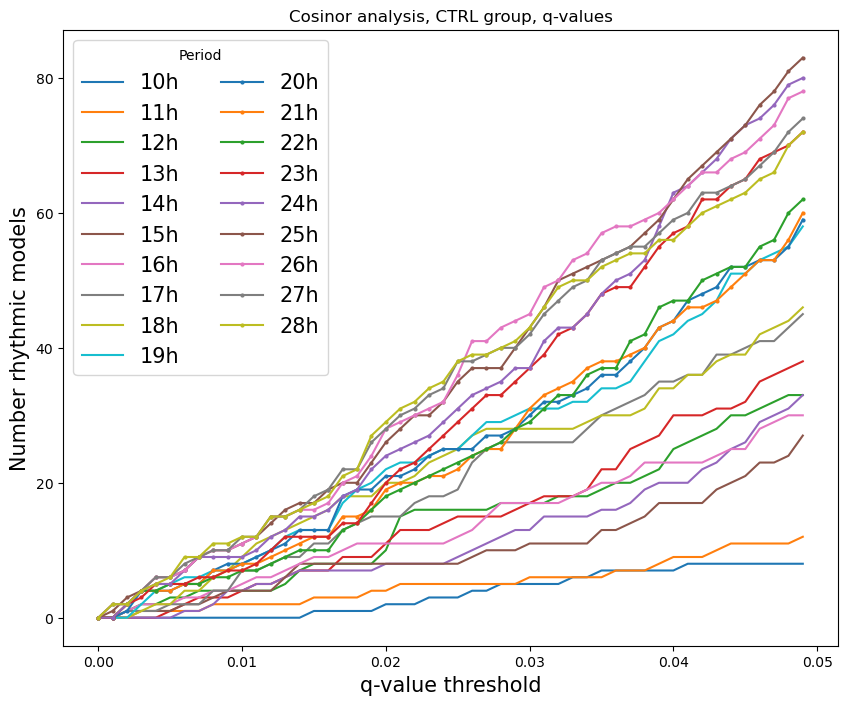

In [12]:
rhythm_prots_period_ctrl = {'qval':[],'nb_prots_ctrl_10':[],'nb_prots_ctrl_11':[],'nb_prots_ctrl_12':[],
                            'nb_prots_ctrl_13':[],'nb_prots_ctrl_14':[],'nb_prots_ctrl_15':[],'nb_prots_ctrl_16':[],
                            'nb_prots_ctrl_17':[],'nb_prots_ctrl_18':[],'nb_prots_ctrl_19':[],'nb_prots_ctrl_20':[],
                            'nb_prots_ctrl_21':[],'nb_prots_ctrl_22':[],'nb_prots_ctrl_23':[], 'nb_prots_ctrl_24':[],
                            'nb_prots_ctrl_25':[],'nb_prots_ctrl_26':[],'nb_prots_ctrl_27':[],'nb_prots_ctrl_28':[],
                            'nb_prots_ctrl_29':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_ctrl['qval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_ctrl.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_qval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_ctrl[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_ctrl"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_ctrl['qval'], rhythm_prots_period_ctrl[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, CTRL group, q-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("q-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_mass_spec_cosinor_ctrl_qval.png', dpi = 300)

### NLRP3 - qval
Plot of the number of rhythmic models according to q-value threshold for each period value

<Figure size 640x480 with 0 Axes>

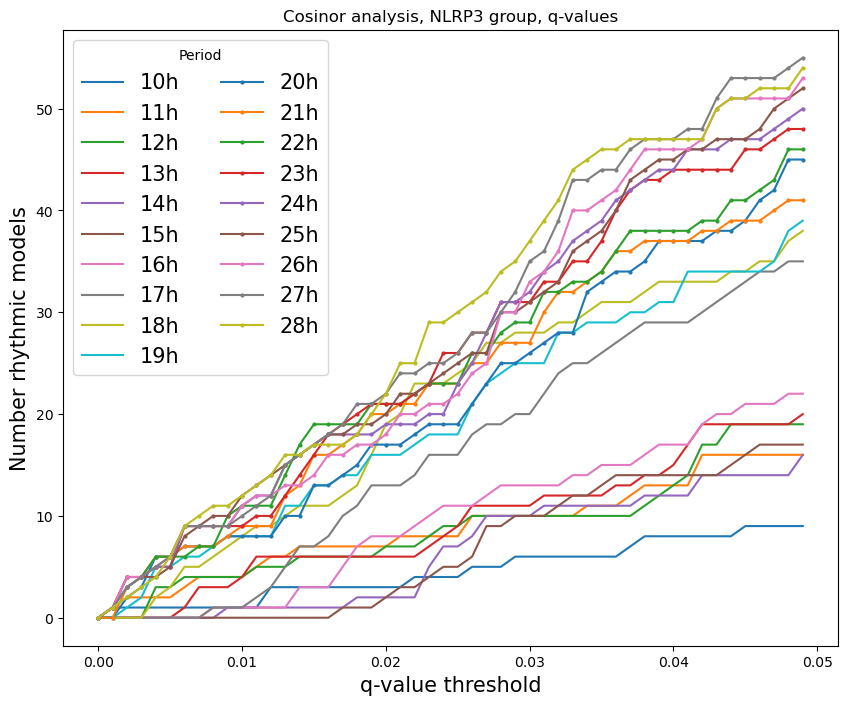

In [13]:
rhythm_prots_period_nlrp3 = {'qval':[],'nb_prots_nlrp3_10':[],'nb_prots_nlrp3_11':[],'nb_prots_nlrp3_12':[],
                            'nb_prots_nlrp3_13':[],'nb_prots_nlrp3_14':[],'nb_prots_nlrp3_15':[],'nb_prots_nlrp3_16':[],
                            'nb_prots_nlrp3_17':[],'nb_prots_nlrp3_18':[],'nb_prots_nlrp3_19':[],'nb_prots_nlrp3_20':[],
                            'nb_prots_nlrp3_21':[],'nb_prots_nlrp3_22':[],'nb_prots_nlrp3_23':[], 'nb_prots_nlrp3_24':[],
                            'nb_prots_nlrp3_25':[],'nb_prots_nlrp3_26':[],'nb_prots_nlrp3_27':[],'nb_prots_nlrp3_28':[],
                            'nb_prots_nlrp3_29':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_nlrp3['qval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_nlrp3.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_qval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_nlrp3[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_nlrp3"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_nlrp3['qval'], rhythm_prots_period_nlrp3[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, NLRP3 group, q-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("q-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_mass_spec_cosinor_nlrp3_qval.png', dpi = 300)


### BOTH - qval
Plot of the number of rhythmic models according to q-value threshold for each period value

<Figure size 640x480 with 0 Axes>

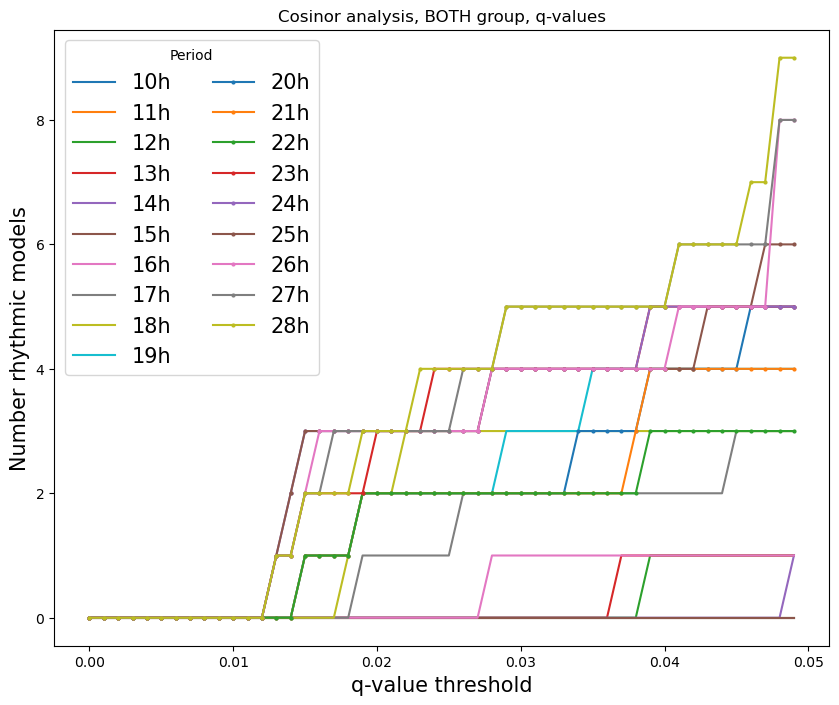

In [14]:
rhythm_prots_period_both = {'qval':[],'nb_prots_both_10':[],'nb_prots_both_11':[],'nb_prots_both_12':[],
                            'nb_prots_both_13':[],'nb_prots_both_14':[],'nb_prots_both_15':[],'nb_prots_both_16':[],
                            'nb_prots_both_17':[],'nb_prots_both_18':[],'nb_prots_both_19':[],'nb_prots_both_20':[],
                            'nb_prots_both_21':[],'nb_prots_both_22':[],'nb_prots_both_23':[], 'nb_prots_both_24':[],
                            'nb_prots_both_25':[],'nb_prots_both_26':[],'nb_prots_both_27':[],'nb_prots_both_28':[],
                            'nb_prots_both_29':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_both['qval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_both.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_qval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_both[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_both"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_both['qval'], rhythm_prots_period_both[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, BOTH group, q-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("q-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_mass_spec_cosinor_both_qval.png', dpi = 300)
